# MLP on MNIST -- KERAS

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [8]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# SOFTMAX CLASSIFIER

In [10]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

In [13]:
model_SM = Sequential()

model_SM.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

model_SM.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model_SM.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model_SM.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 26us/step - loss: 1.2824 - accuracy: 0.6954 - val_loss: 0.8141 - val_accuracy: 0.8287
Epoch 2/20
60000/60000 [==============================] - 1s 25us/step - loss: 0.7160 - accuracy: 0.8387 - val_loss: 0.6075 - val_accuracy: 0.8628
Epoch 3/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.5869 - accuracy: 0.8589 - val_loss: 0.5253 - val_accuracy: 0.8764
Epoch 4/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.5252 - accuracy: 0.8688 - val_loss: 0.4793 - val_accuracy: 0.8837
Epoch 5/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.4877 - accuracy: 0.8749 - val_loss: 0.4495 - val_accuracy: 0.8876
Epoch 6/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.4619 - accuracy: 0.8797 - val_loss: 0.4281 - val_accuracy: 0.8902
Epoch 7/20
60000/60000 [==============================] - 2s 34us/s

Test score: 0.3348016109228134
Test accuracy: 0.9089000225067139


<IPython.core.display.Javascript object>


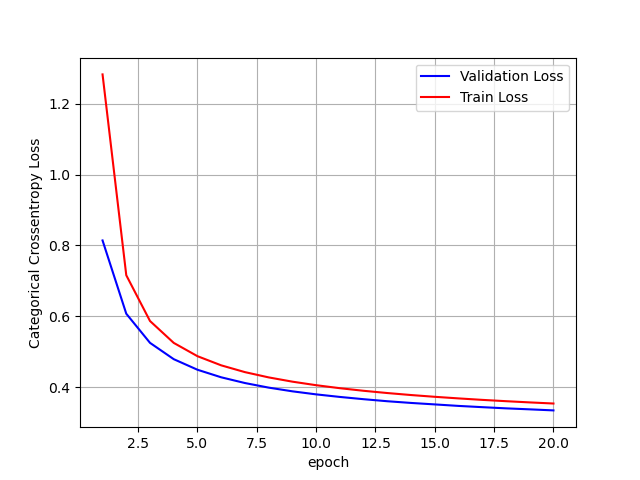

In [15]:
score = model_SM.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# MLP + Sigmoid Activation + SGD Optimizer 

In [16]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 129us/step - loss: 2.2722 - accuracy: 0.2164 - val_loss: 2.2231 - val_accuracy: 0.5307
Epoch 2/20
60000/60000 [==============================] - 7s 120us/step - loss: 2.1804 - accuracy: 0.4582 - val_loss: 2.1246 - val_accuracy: 0.5953
Epoch 3/20
60000/60000 [==============================] - 7s 111us/step - loss: 2.0647 - accuracy: 0.5911 - val_loss: 1.9830 - val_accuracy: 0.6103
Epoch 4/20
60000/60000 [==============================] - 9s 144us/step - loss: 1.8988 - accuracy: 0.6513 - val_loss: 1.7848 - val_accuracy: 0.6950
Epoch 5/20
60000/60000 [==============================] - 12s 198us/step - loss: 1.6809 - accuracy: 0.6907 - val_loss: 1.5459 - val_accuracy: 0.7207
Epoch 6/20
60000/60000 [==============================] - 11s 189us/step - loss: 1.4442 - accuracy: 0.7242 - val_loss: 1.3138 - val_accuracy: 0.7517
Epoch 7/20
60000/60000 [==============================] - 11

Test score: 0.46571189484596254
Test accuracy: 0.8758000135421753


<IPython.core.display.Javascript object>


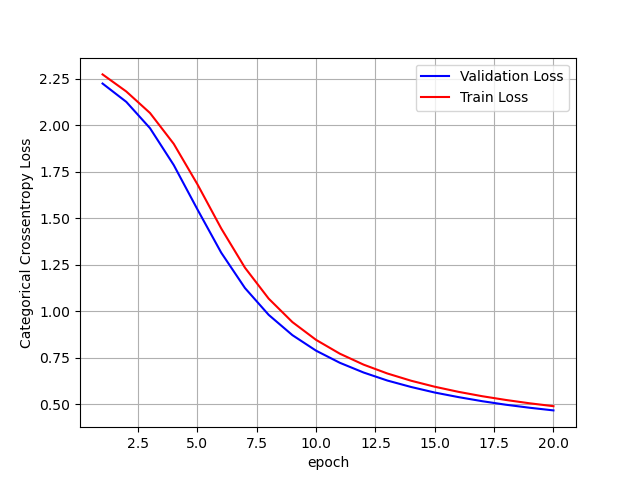

In [18]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


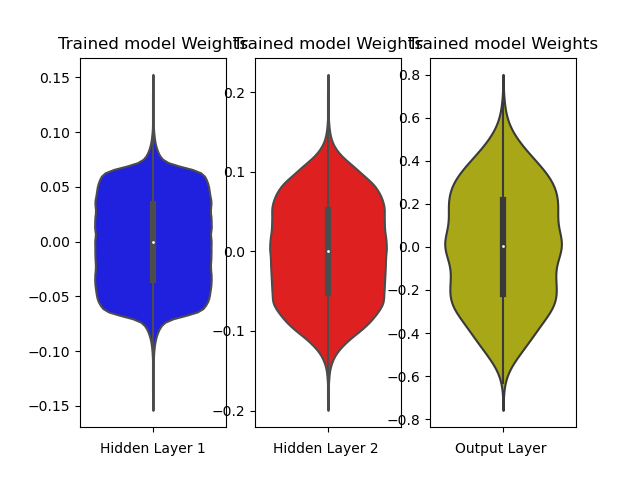

In [19]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + Sigmoid Activation + Adam Optimizer

In [21]:
model_adam = Sequential()
model_adam.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_adam.add(Dense(128, activation='sigmoid'))
model_adam.add(Dense(output_dim, activation='softmax'))

model_adam.summary()

model_adam.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_adam.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
model_adam.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 215us/step - loss: 0.5258 - accuracy: 0.8611 - val_loss: 0.2545 - val_accuracy: 0.9260
Epoch 2/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.2234 - accuracy: 0.9349 - val_loss: 0.1853 - val_accuracy: 0.9437
Epoch 3/20
60000/60000 [=======

Test score: 0.07114961849087703
Test accuracy: 0.9811999797821045


<IPython.core.display.Javascript object>


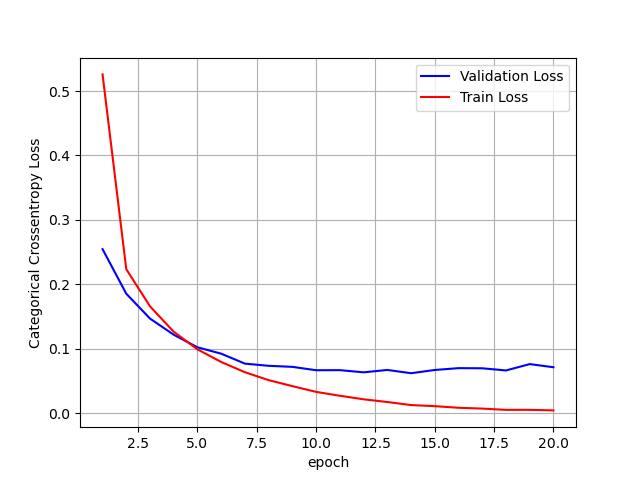

In [22]:
score = model_adam.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


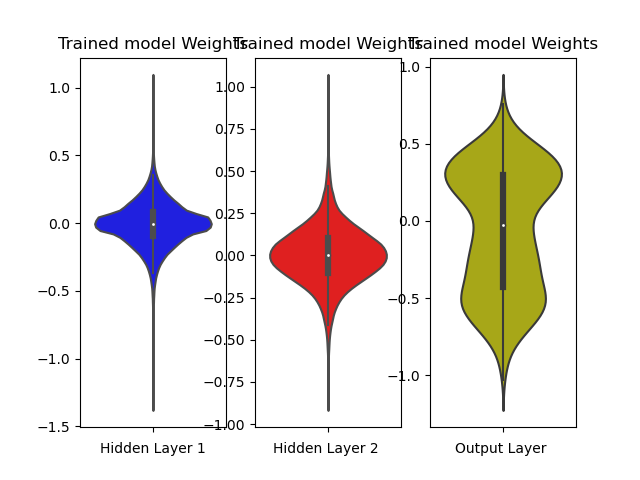

In [23]:
w_after = model_adam.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + ReLU + SGD (2 hidden layers)

In [24]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 146us/step - loss: 0.7777 - accuracy: 0.7825 - val_loss: 0.3946 - val_accuracy: 0.8928
Epoch 2/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.3648 - accuracy: 0.8975 - val_loss: 0.3051 - val_accuracy: 0.9137
Epoch 3/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.3004 - accuracy: 0.9143 - val_loss: 0.2655 - val_accuracy: 0.9260
Epoch 4/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.2650 - accuracy: 0.9247 - val_loss: 0.2445 - val_accuracy: 0.9298
Epoch 5/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.2406 - accuracy: 0.9312 - val_loss: 0.2247 - val_accuracy: 0.9354
Epoch 6/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.2216 - accuracy: 0.9370 - val_loss: 0.2095 - val_accuracy: 0.9390
Epoch 7/20
60000/60000 [==============================] - 8s 12

Test score: 0.12550043169148267
Test accuracy: 0.9623000025749207


<IPython.core.display.Javascript object>


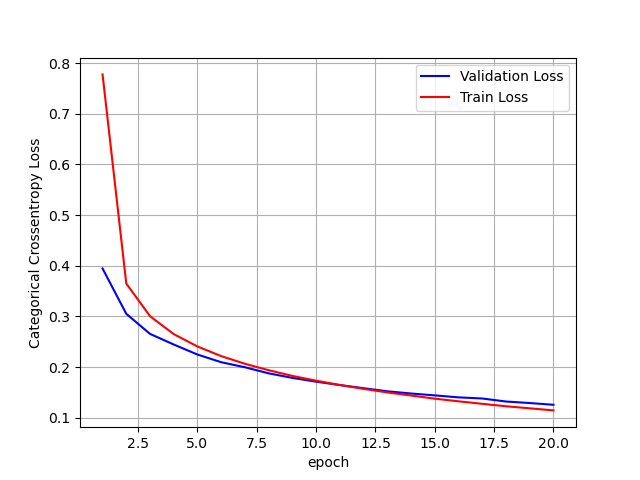

In [26]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


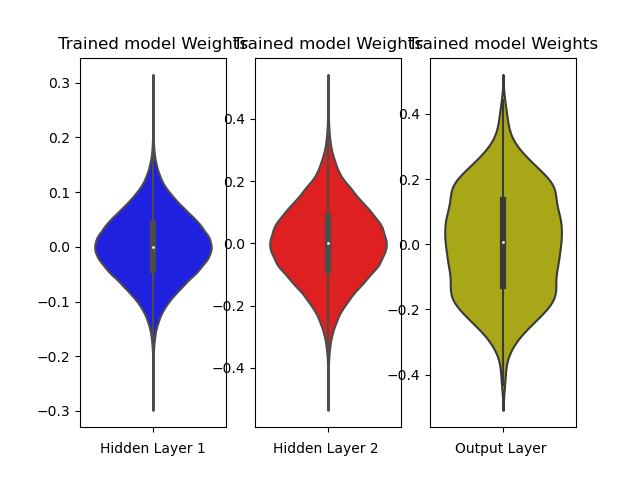

In [27]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + ReLU + ADAM (2 hidden layers)

In [28]:
model_RA = Sequential()
model_RA.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_RA.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_RA.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_RA.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_RA.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.2292 - accuracy: 0.9330 - val_loss: 0.1111 - val_accuracy: 0.9659
Epoch 2/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.0873 - accuracy: 0.9737 - val_loss: 0.0816 - val_accuracy: 0.9746
Epoch 3/20
60000/60000 [==

Test score: 0.10158717686897883
Test accuracy: 0.98089998960495


<IPython.core.display.Javascript object>


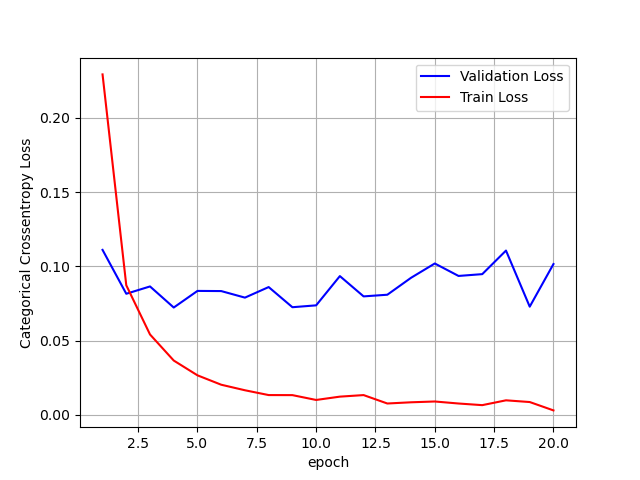

In [29]:
score = model_RA.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


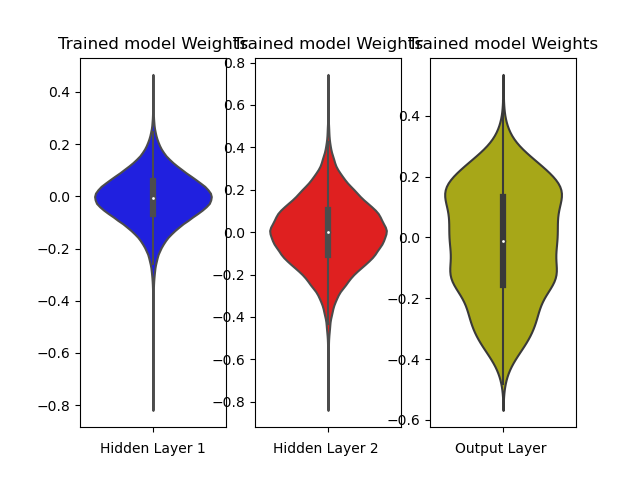

In [30]:
w_after = model_RA.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + BatchNormalization on hidden Layers + AdamOptimizer

In [31]:
from keras.layers.normalization import BatchNormalization

In [32]:
model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_20 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [33]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.3007 - accuracy: 0.9102 - val_loss: 0.2063 - val_accuracy: 0.9387
Epoch 2/20
60000/60000 [==============================] - 14s 240us/step - loss: 0.1711 - accuracy: 0.9494 - val_loss: 0.1642 - val_accuracy: 0.9497
Epoch 3/20
60000/60000 [==============================] - 12s 194us/step - loss: 0.1338 - accuracy: 0.9606 - val_loss: 0.1454 - val_accuracy: 0.9565
Epoch 4/20
60000/60000 [==============================] - 15s 248us/step - loss: 0.1116 - accuracy: 0.9658 - val_loss: 0.1271 - val_accuracy: 0.9617
Epoch 5/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0934 - accuracy: 0.9721 - val_loss: 0.1286 - val_accuracy: 0.9597
Epoch 6/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.0797 - accuracy: 0.9758 - val_loss: 0.1139 - val_accuracy: 0.9643
Epoch 7/20
60000/60000 [==============================] -

Test score: 0.09601243822078687
Test accuracy: 0.9746000170707703


<IPython.core.display.Javascript object>


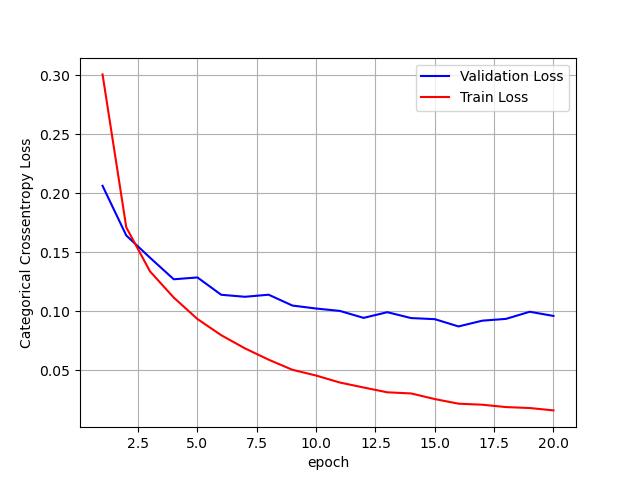

In [34]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


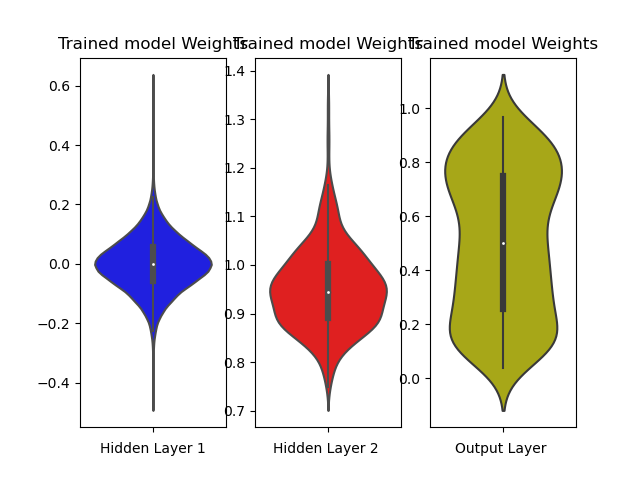

In [35]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + Dropout + AdamOptimizer

In [36]:
from keras.layers import Dropout

In [37]:
model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)              

In [38]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 231us/step - loss: 0.6723 - accuracy: 0.7924 - val_loss: 0.2887 - val_accuracy: 0.9149
Epoch 2/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.4327 - accuracy: 0.8676 - val_loss: 0.2559 - val_accuracy: 0.9260
Epoch 3/20
60000/60000 [==============================] - 13s 219us/step - loss: 0.3867 - accuracy: 0.8828 - val_loss: 0.2320 - val_accuracy: 0.9317
Epoch 4/20
60000/60000 [==============================] - 14s 226us/step - loss: 0.3560 - accuracy: 0.8924 - val_loss: 0.2225 - val_accuracy: 0.9339
Epoch 5/20
60000/60000 [==============================] - 21s 354us/step - loss: 0.3390 - accuracy: 0.8992 - val_loss: 0.2128 - val_accuracy: 0.9387
Epoch 6/20
60000/60000 [==============================] - 18s 306us/step - loss: 0.3226 - accuracy: 0.9024 - val_loss: 0.1987 - val_accuracy: 0.9410
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.11187576369792222
Test accuracy: 0.9681000113487244


<IPython.core.display.Javascript object>


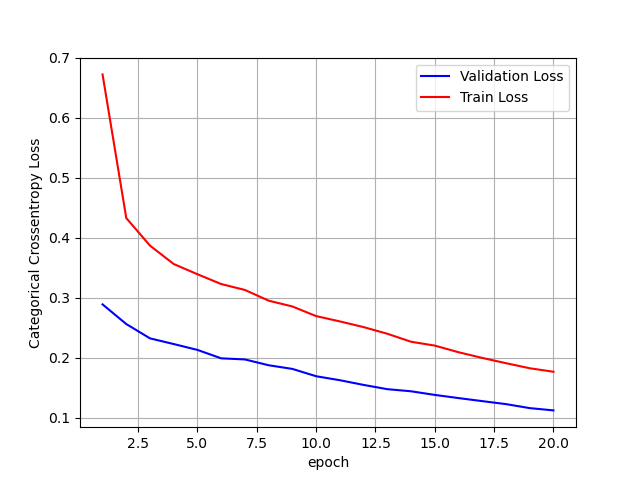

In [39]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


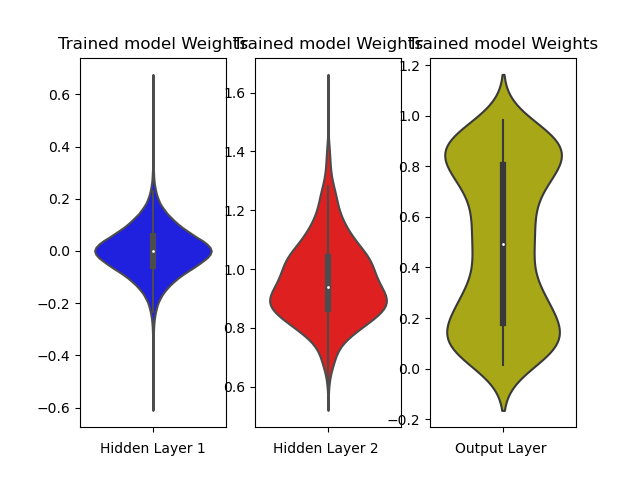

In [40]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + ReLU + Adam + Dropout + BatchNormalization with 2 Layers

In [41]:
model = Sequential()
model.add(Dense(500, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(250, activation='relu', kernel_initializer='he_normal') )
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 500)               392500    
_________________________________________________________________
batch_normalization_5 (Batch (None, 500)               2000      
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 250)               125250    
_________________________________________________________________
batch_normalization_6 (Batch (None, 250)               1000      
_________________________________________________________________
dropout_4 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)              

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 260us/step - loss: 0.3186 - accuracy: 0.9013 - val_loss: 0.1183 - val_accuracy: 0.9638
Epoch 2/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.1588 - accuracy: 0.9510 - val_loss: 0.0876 - val_accuracy: 0.9711
Epoch 3/20
60000/60000 [==============================] - 17s 288us/step - loss: 0.1255 - accuracy: 0.9609 - val_loss: 0.0729 - val_accuracy: 0.9768
Epoch 4/20
60000/60000 [==============================] - 15s 249us/step - loss: 0.1064 - accuracy: 0.9667 - val_loss: 0.0749 - val_accuracy: 0.9756
Epoch 5/20
60000/60000 [==============================] - 17s 276us/step - loss: 0.0940 - accuracy: 0.9707 - val_loss: 0.0635 - val_accuracy: 0.9795
Epoch 6/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.0876 - accuracy: 0.9714 - val_loss: 0.0624 - val_accuracy: 0.9790
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.04954541923795623
Test accuracy: 0.9861000180244446


<IPython.core.display.Javascript object>


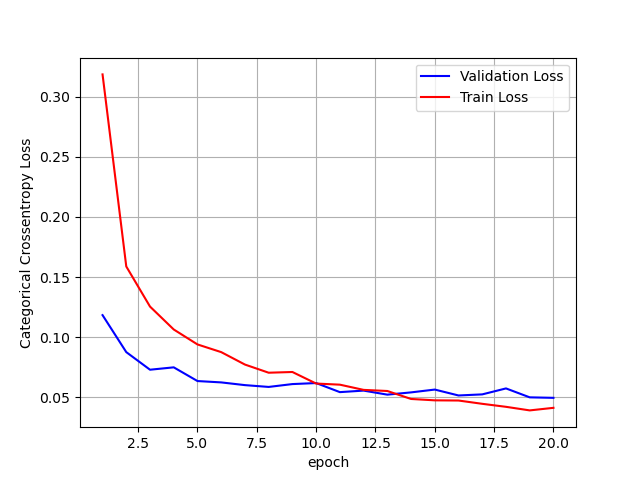

In [43]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


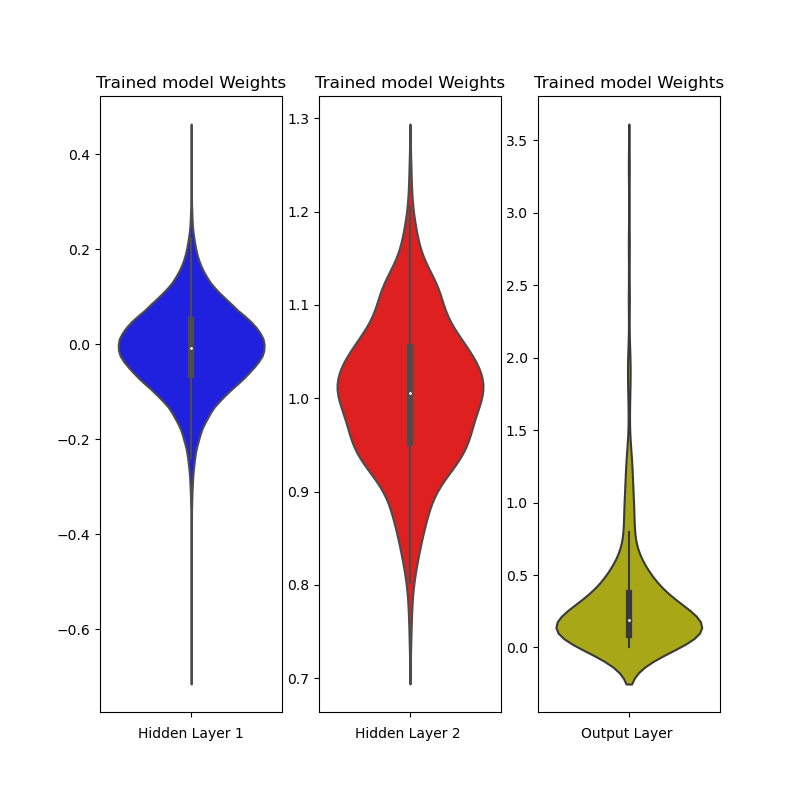

In [44]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(8,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + ReLU + Adam + Dropout + BatchNormalization with 3 Layers

In [45]:
model = Sequential()
model.add(Dense(630, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(320, activation='relu', kernel_initializer='he_normal') )
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Dense(210, activation='relu', kernel_initializer='he_normal') )
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 630)               494550    
_________________________________________________________________
batch_normalization_7 (Batch (None, 630)               2520      
_________________________________________________________________
dropout_5 (Dropout)          (None, 630)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 320)               201920    
_________________________________________________________________
batch_normalization_8 (Batch (None, 320)               1280      
_________________________________________________________________
dropout_6 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 210)             

In [46]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 23s 379us/step - loss: 0.3753 - accuracy: 0.8846 - val_loss: 0.1299 - val_accuracy: 0.9597
Epoch 2/20
60000/60000 [==============================] - 23s 390us/step - loss: 0.1774 - accuracy: 0.9464 - val_loss: 0.0963 - val_accuracy: 0.9711
Epoch 3/20
60000/60000 [==============================] - 21s 344us/step - loss: 0.1400 - accuracy: 0.9561 - val_loss: 0.0856 - val_accuracy: 0.9724
Epoch 4/20
60000/60000 [==============================] - 20s 334us/step - loss: 0.1226 - accuracy: 0.9614 - val_loss: 0.0752 - val_accuracy: 0.9766
Epoch 5/20
60000/60000 [==============================] - 23s 383us/step - loss: 0.1042 - accuracy: 0.9674 - val_loss: 0.0657 - val_accuracy: 0.9792
Epoch 6/20
60000/60000 [==============================] - 24s 394us/step - loss: 0.0938 - accuracy: 0.9700 - val_loss: 0.0679 - val_accuracy: 0.9795
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.04693986625653342
Test accuracy: 0.9860000014305115


<IPython.core.display.Javascript object>


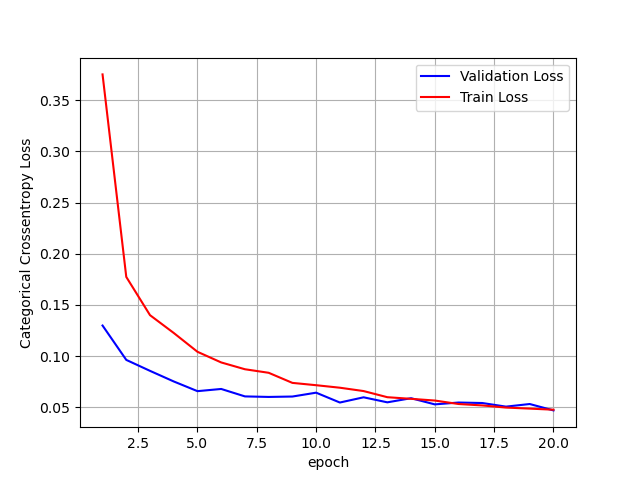

In [47]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# MLP + ReLU + Adam + Dropout + BatchNormalization with 5 Layers

In [48]:
model = Sequential()
model.add(Dense(720, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(620, activation='relu', kernel_initializer='he_normal') )
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(520, activation='relu', kernel_initializer='he_normal') )
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(320, activation='relu', kernel_initializer='he_normal') )
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(220, activation='relu', kernel_initializer='he_normal') )
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 720)               565200    
_________________________________________________________________
batch_normalization_10 (Batc (None, 720)               2880      
_________________________________________________________________
dropout_8 (Dropout)          (None, 720)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 620)               447020    
_________________________________________________________________
batch_normalization_11 (Batc (None, 620)               2480      
_________________________________________________________________
dropout_9 (Dropout)          (None, 620)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 520)             

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 51s 852us/step - loss: 0.4145 - accuracy: 0.8705 - val_loss: 0.1329 - val_accuracy: 0.9588
Epoch 2/20
60000/60000 [==============================] - 52s 862us/step - loss: 0.1932 - accuracy: 0.9406 - val_loss: 0.1017 - val_accuracy: 0.9679
Epoch 3/20
60000/60000 [==============================] - 45s 745us/step - loss: 0.1495 - accuracy: 0.9542 - val_loss: 0.0959 - val_accuracy: 0.9713
Epoch 4/20
60000/60000 [==============================] - 37s 624us/step - loss: 0.1280 - accuracy: 0.9594 - val_loss: 0.0845 - val_accuracy: 0.9751
Epoch 5/20
60000/60000 [==============================] - 35s 588us/step - loss: 0.1165 - accuracy: 0.9634 - val_loss: 0.0743 - val_accuracy: 0.9763
Epoch 6/20
60000/60000 [==============================] - 35s 581us/step - loss: 0.1051 - accuracy: 0.9682 - val_loss: 0.0707 - val_accuracy: 0.9788
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.051324672119307795
Test accuracy: 0.9861999750137329


<IPython.core.display.Javascript object>


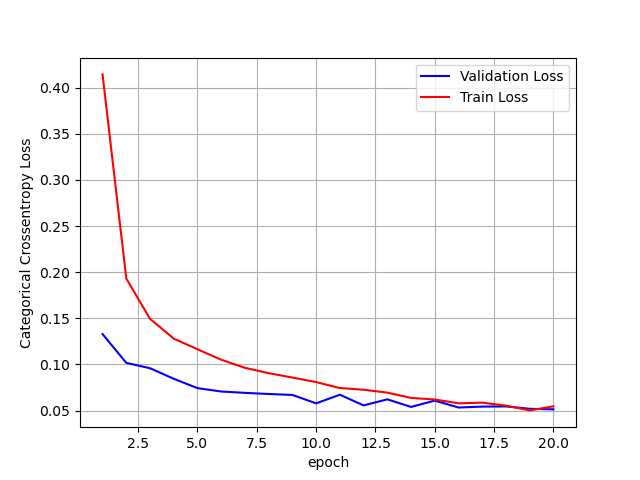

In [50]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Conclusion

Test Accuracy of all 3 Architectures are nearly same

By Using Different Dropout rates in each layer the accuracy Increases and Training Loss Decreases as compared to using the same dropout rate in each layer

As MNIST problem is very easy problem so we can't see much differnce between differnet architectures

But as Complexity of Problems increases we will see so much difference while using different architectures

In [57]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = [ "No._of_Hidden_Layers","Architecture","Dropout_Rates",'Train_Loss','Test_Accuracy']

In [58]:
x.add_row(['2','[784,500,250,10]','[0.50,0.25]','0.041','98.61%'])
x.add_row(['3','[784,630,320,210,10]','[0.50,0.35,0.25]','0.045','98.62%'])
x.add_row(['5','[784,720,620,520,320,220,10]','[0.50,0.40,0.30,0.20,0.10]','0.051','98.53%'])

In [59]:
print(x)

+----------------------+------------------------------+----------------------------+------------+---------------+
| No._of_Hidden_Layers |         Architecture         |       Dropout_Rates        | Train_Loss | Test_Accuracy |
+----------------------+------------------------------+----------------------------+------------+---------------+
|          2           |       [784,500,250,10]       |        [0.50,0.25]         |   0.041    |     98.61%    |
|          3           |     [784,630,320,210,10]     |      [0.50,0.35,0.25]      |   0.045    |     98.62%    |
|          5           | [784,720,620,520,320,220,10] | [0.50,0.40,0.30,0.20,0.10] |   0.051    |     98.53%    |
+----------------------+------------------------------+----------------------------+------------+---------------+
